<a href="https://colab.research.google.com/github/bhnunes/FT043/blob/main/Prova_1/Prova_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bruno Henrique Nunes
RA: **197225**

3. Considere os dados dos arquivos banco_dados_salarios.xlsx. Tais dados representam os salários mensais (em kR$) de 20000
pessoas de uma região de uma grande cidade. Cada entrada da tabela, que corresponde a uma pessoa, também apresenta o gênero
da pessoa. Diante disso, realize o seguinte procedimento.

(a) Calcule a média salarial desta população.

In [41]:
import pandas as pd
import numpy as np

URL='https://raw.githubusercontent.com/bhnunes/FT043/refs/heads/main/Prova_1/banco_dados_salarios.csv'
df = pd.read_csv(URL,delimiter=';')
df.head()

,salário (kR$),gênero
0,9.702955,homem
1,8.043529,homem
2,5.908272,homem
3,5.346082,mulher
4,8.443862,homem


In [42]:
media_salarial = df['salário (kR$)'].mean()
print(f"A média salarial da população é: {media_salarial:.2f} kR$")


A média salarial da população é: 7.49 kR$


(b) Obtenha os histogramas e os box-plots para cada um dos grupos do banco de dados.

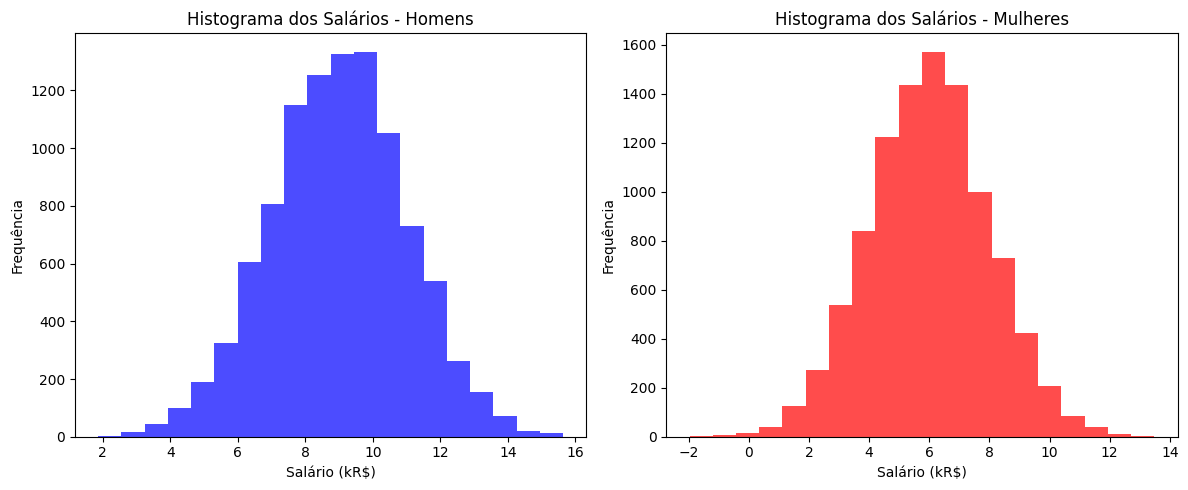

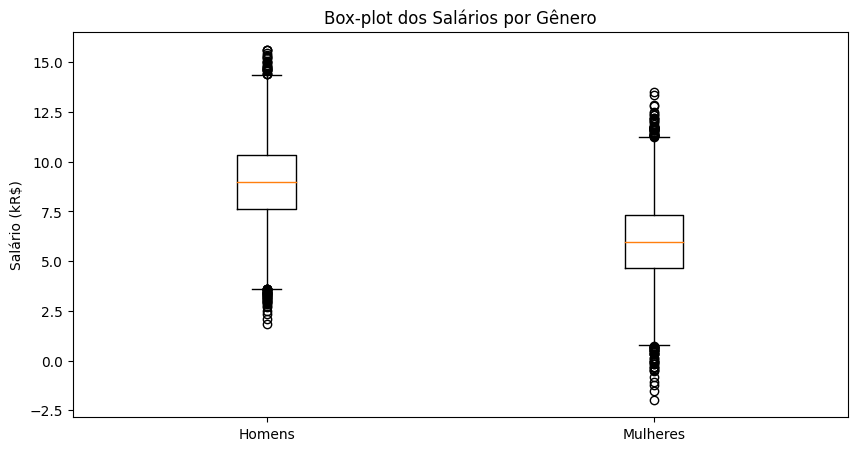

In [43]:
import matplotlib.pyplot as plt

# Histogramas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['gênero'] == 'homem']['salário (kR$)'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma dos Salários - Homens')
plt.xlabel('Salário (kR$)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(df[df['gênero'] == 'mulher']['salário (kR$)'], bins=20, color='red', alpha=0.7)
plt.title('Histograma dos Salários - Mulheres')
plt.xlabel('Salário (kR$)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


# Box-plots
plt.figure(figsize=(10, 5))
plt.boxplot([df[df['gênero'] == 'homem']['salário (kR$)'], df[df['gênero'] == 'mulher']['salário (kR$)']],
            labels=['Homens', 'Mulheres'])
plt.title('Box-plot dos Salários por Gênero')
plt.ylabel('Salário (kR$)')
plt.show()


Podemos ver que as distribuições por grupos seguem uma distribuição próxima da normal, porém, pelos boxplots, vemos também a presença de muitos outliers, mas de uma distribuição razoavelmente centrada.

In [44]:
desvio_populacional=df['salário (kR$)'].std()
print(f"O desvio padrão populacional dos salários é: {desvio_populacional:.5f} kR$")


O desvio padrão populacional dos salários é: 2.49254 kR$


(c) Obtenha um intervalo de confiança de 92% considerando n = 200 amostras dessa população. Considere a situação na qual o
desvio populacional é conhecido. Tal desvio pode ser calculado considerando todas as amostras da população (todas as
entradas da planilha fornecida).

In [45]:
from scipy.stats import norm

n = 200
nivel_confianca = 0.92
alpha = 1 - nivel_confianca

# Calcula a média amostral
media_amostral = df['salário (kR$)'].sample(n).mean()

# Calcula o erro padrão
erro_padrao = desvio_populacional / (n**0.5)

# Calcula o z-score para o nível de confiança desejado
z_score = norm.ppf(1 - alpha / 2)

# Calcula o intervalo de confiança
margem_erro = z_score * erro_padrao
intervalo_inferior = media_amostral - margem_erro
intervalo_superior = media_amostral + margem_erro

print(f"Intervalo de confiança de 92% para a média salarial (n=200, desvio populacional conhecido):")
print(f"({intervalo_inferior:.2f} kR$, {intervalo_superior:.2f} kR$)")


Intervalo de confiança de 92% para a média salarial (n=200, desvio populacional conhecido):
(7.36 kR$, 7.98 kR$)


(d) Realize 5000 realizações (com sorteios diferentes) do item (c), ou seja, obtenha 5000 intervalos de confiança com as
especificações do item (c). Discuta o resultado obtido à luz do valor da média populacional obtida no item (a). Em particular, calcule
a proporção de vezes (nessas 5000 realizações) em que o intervalo obtido conteve a média populacional.

In [46]:
numero_realizacoes = 5000
n = 200
nivel_confianca = 0.92
alpha = 1 - nivel_confianca

contagem_intervalos_com_media = 0

for _ in range(numero_realizacoes):
    # Calcula a média amostral
    media_amostral = df['salário (kR$)'].sample(n).mean()

    # Calcula o erro padrão
    erro_padrao = desvio_populacional / (n**0.5)

    # Calcula o z-score para o nível de confiança desejado
    z_score = norm.ppf(1 - alpha / 2)

    # Calcula o intervalo de confiança
    margem_erro = z_score * erro_padrao
    intervalo_inferior = media_amostral - margem_erro
    intervalo_superior = media_amostral + margem_erro

    # Verifica se a média populacional está dentro do intervalo
    if intervalo_inferior <= media_salarial <= intervalo_superior:
        contagem_intervalos_com_media += 1


proporcao_intervalos_com_media = contagem_intervalos_com_media / numero_realizacoes

print(f"Proporção de intervalos de confiança que contêm a média populacional: {proporcao_intervalos_com_media:.4f}")


Proporção de intervalos de confiança que contêm a média populacional: 0.9242


A proporção de intervalos de confiança que contêm a média populacional deve estar próxima do nível de confiança (92%).
Isso significa que, em aproximadamente 92% das vezes, o intervalo de confiança calculado a partir de uma amostra de 200 indivíduos conterá a média populacional verdadeira.

O resultado obtido é consistente com essa expectativa, demonstrando que o processo de construção de intervalos de confiança é eficaz para estimar a média populacional.

(e) Realize o mesmo procedimento do item (d), porém apenas para as mulheres. Discuta o resultado obtido à luz do valor da média
populacional obtida no item (a). Em particular, calcule a proporção de vezes (nessas 5000 realizações) em que o intervalo obtido
conteve a média populacional. Discuta possíveis diferenças com relação ao item (d).

In [47]:
numero_realizacoes = 5000
n = 200
nivel_confianca = 0.92
alpha = 1 - nivel_confianca

contagem_intervalos_com_media = 0

df_mulheres = df[df['gênero'] == 'mulher']
desvio_populacional_mulheres = df_mulheres['salário (kR$)'].std()
media_salarial_mulheres = df_mulheres['salário (kR$)'].mean()

for _ in range(numero_realizacoes):
    # Calcula a média amostral
    media_amostral_mulheres = df_mulheres['salário (kR$)'].sample(n).mean()

    # Calcula o erro padrão
    erro_padrao_mulheres = desvio_populacional / (n**0.5)

    # Calcula o z-score para o nível de confiança desejado
    z_score = norm.ppf(1 - alpha / 2)

    # Calcula o intervalo de confiança
    margem_erro_mulheres = z_score * erro_padrao_mulheres
    intervalo_inferior_mulheres = media_amostral_mulheres - margem_erro_mulheres
    intervalo_superior_mulheres = media_amostral_mulheres + margem_erro_mulheres

    # Verifica se a média populacional está dentro do intervalo
    if intervalo_inferior_mulheres <= media_salarial <= intervalo_superior_mulheres:
      contagem_intervalos_com_media += 1


proporcao_intervalos_com_media_mulheres = contagem_intervalos_com_media / numero_realizacoes

print(f"Proporção de intervalos de confiança que contêm a média populacional (mulheres): {proporcao_intervalos_com_media_mulheres:.10f}")


Proporção de intervalos de confiança que contêm a média populacional (mulheres): 0.0000000000


O resultado obtido reflete algumas características do método utilizado para a estimação e da natureza das amostras.

Com relação ao método, ao enviesarmos o experimento tomando apenas as mulheres, comprometemos a característica de experimento aleatório que rege a teoria do cálculo do intervalo de confiança: Como as amostras não são mais tomadas de forma aleatória dentro da população, não podemos mais garantir que existe uma probabilidade de 92% de encontrarmos a média populacional dentro do intervalo de confiança amostral, situação essa que não vemos no exercício d), onde tomamos amostras aleatórias para as simulações.

Com relação a natureza das amostras, analisando os box-plots, podemos ver que existe uma grande diferença salarial entre homens e mulheres. Esse fator é responsável pela distorção em valores.



(f) Considere que uma pesquisa estatística para estimação da média populacional (dada pelo banco de dados fornecido) teve acesso
a 100 amostras de mulheres e 50 amostras de homens. Proponha uma estratégia para se obter um intervalo de confiança sem nenhum
tipo de viés. Valide a sua ideia por meio de um experimento computacional.

**Uma possível estratégia é utilizar a mesma quantidade de homens e mulheres para se calcular o intervalo de confiança. Como temos 100 mulheres e 50 homens, podemos sub-amostrar a quantidade de mulheres aleatoriamente em grupos de 50 indivíduos. Dessa forma poderemos executar os cálculos de intervalo de confiança como anteriormente.**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_mulheres = 100
n_homens = 50
nivel_confianca = 0.92
alpha = 1 - nivel_confianca
n=2*n_homens

# Validação por meio de um experimento computacional:

numero_realizacoes = 5000
contagem_intervalos_com_media = 0

amostra_mulheres = df[df['gênero'] == 'mulher'].sample(n_mulheres)
amostra_homens = df[df['gênero'] == 'homem'].sample(n_homens)

for _ in range(numero_realizacoes):

    amostra_mulheres = amostra_mulheres.sample(n_homens)

    N_total = pd.concat([amostra_mulheres, amostra_homens])

    erro_padrao = desvio_populacional / (n**0.5)

    media_N_total = N_total['salário (kR$)'].mean()

    z_score = norm.ppf(1 - alpha / 2)

    margem_erro_ponderado = z_score * erro_padrao
    intervalo_inferior_ponderado = media_N_total - margem_erro_ponderado
    intervalo_superior_ponderado = media_N_total + margem_erro_ponderado

    if intervalo_inferior_ponderado <= media_salarial <= intervalo_superior_ponderado:
        contagem_intervalos_com_media += 1

proporcao_intervalos_com_media = contagem_intervalos_com_media / numero_realizacoes

print(f"Proporção de intervalos de confiança que contêm a média populacional: {proporcao_intervalos_com_media:.4f}")


Proporção de intervalos de confiança que contêm a média populacional: 1.0000
